## Colin's Pipeline Experiments
### Objectives:
- Create a SingleImagePipeline so we can run fast-iteration experiments on just a single image
- Create a CentraPipeline that calls SingleImagePipeline
- Modularize the soccer_net_pipeline and migrate all operations to SingleImagePipeline
- Run all systematic ops from CentralPipeline (more than one tracklet)

### Main benefit from creating a `SingleImagePipeline` and a `CentralPipeline`
Decoupling large-scale systematic training versus testing. The main pipeline trains the model, creates output processed images and does so by systematically traversing all the tracklets. I want to be able to see what pre-processing is happening to the image so I can understand what is being fed to the model. I also just want to be able to pass a single raw image to the model so I can get fast results. Right now everything is coupled together by all the tracklets, and I don't want to traverse all of them or even a single tracklet, but maybe only a single image from a single tracklet.

### Quick Run Block

In [1]:
import sys
from pathlib import Path
import os

sys.path.append(str(Path.cwd().parent.parent))
print(str(Path.cwd().parent.parent))
print("Current working directory: ", os.getcwd())

from ModelDevelopment.CentralPipeline import CentralPipeline
from ModelDevelopment.SingleImagePipeline import SingleImagePipeline
from DataProcessing.DataPreProcessing import DataPaths

c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition
Current working directory:  c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\ModelDevelopment\experiments


ImportError: cannot import name 'cfg' from 'config' (c:\Users\colin\miniconda3\envs\UBC\Lib\site-packages\config\__init__.py)

In [ ]:
pipeline = CentralPipeline(
  input_data_path=DataPaths.TRAIN_DATA_DIR.value,
  output_processed_data_path=DataPaths.PROCESSED_DATA_OUTPUT_DIR_TRAIN.value
  )

[2025-03-02 21:15:12] - [INFO]: DataPreProcessing initialized. Universe of available data paths:
[2025-03-02 21:15:12] - [INFO]: ROOT_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted
[2025-03-02 21:15:12] - [INFO]: TEST_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\test\images
[2025-03-02 21:15:12] - [INFO]: TRAIN_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\train\images
[2025-03-02 21:15:12] - [INFO]: CHALLENGE_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\challenge\images
[2025-03-02 21:15:12] - [INFO]: PRE_TRAINED_MODELS_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\pre_trained_models
[2025-03-02 21:15:12] - [INFO]: REID_PRE_TRAINED: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\pre_trained_

[2025-03-02 21:15:12] - [INFO]: Running the SoccerNet pipeline.
[2025-03-02 21:15:12] - [INFO]: num_tracklets: 1
[2025-03-02 21:15:12] - [INFO]: Using single-process GPU mode to generate features.


Loading tracklets (GPU):   0%|          | 0/1 [00:00<?, ?it/s]

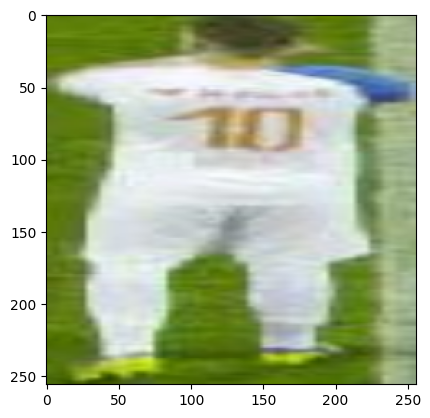

[2025-03-02 21:15:14] - [INFO]: Running model on single image.


In [ ]:
pipeline.run_soccernet_pipeline(num_tracklets=1, num_images_per_tracklet=1, display_transformed_image=True)